<a href="https://colab.research.google.com/github/thumb-chuu/BigData-Internship_statistics/blob/main/%EC%97%84%EC%A7%80%EC%88%98_%EC%8B%A4%EC%8A%B5(2)%EA%B0%80%EC%84%A4%EA%B2%80%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ◆ 가설 검정 실습
### 패키지 Import

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
# 패키지 임포트
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)      # FutureWarning 제거

import pandas as pd
import numpy as np
import math
from scipy import stats

# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# os에 따른 Font 깨짐 제거를 위해 Font 지정 
import os 
if os.name == 'nt' :
    font_family = "NanumBarunGothic" # Windows OS 
else :
    font_family = "NanumBarunGothic" # MAC OS

# - 값이 깨지는 문제 해결을 위해 파라미터 값 설정 
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})

Scipy 패키지
- 사이파이(SciPy)는 수치 해석 기능을 제공하는 파이썬 패키지
- 확률분포 분석을 위한 기능 제공

## 검정 통계량
### 1. 모분산을 알고 있는 경우 모평군의 가설 검정 = Z 검정(단일 표본)
- Scipy 패키지의 확률분포 클래스 stats.norm() 사용
- 사례) 사람의 평균 수명을 알아보기 위해 사망자 100명을 표본으로 추출하여 조사하였더니 평균 71.798년으로 나타났다. 모표준편차를 8.9년으로 가정할 때, 현재의 평균 수명은 70년보다 길다고 할 수 있는가를 검정하라(유의수준 알파=0.05)

### 1) 가설 설정
- 귀무가설 
- 대립가설 (우측검정)
- 유의수준 알파=0.05

### 2) 기각값(임계값)

In [3]:
# 기각값
z_95 = stats.norm.ppf(0.95)
print(z_95)

1.6448536269514722


### 3) 검정 통계량(z통계량)

In [4]:
# 변이 분석
n = 100
m_u = 70
m_sigma = 8.9
hysis_u = 71.798

# 검정 통계량 계산
z = (hysis_u - m_u) / (m_sigma / np.sqrt(n))
print(z)

## print(2 * stats.norm().sf(np.abs(z)))        # 유의확률

2.0202247191011256


### 4) 분포도 작성 및 통계적 결론
- 임계값 1.64 < z통계량 2.02, z통계량은 기각역에 속함

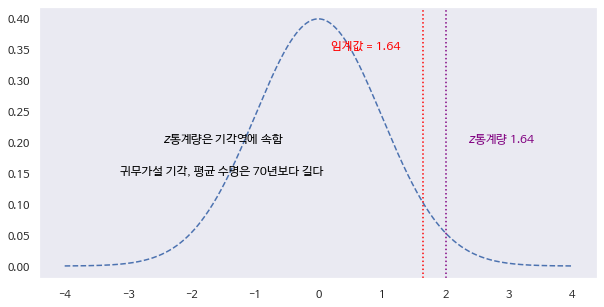

In [5]:
# 시각화
xx = np.linspace(-4, 4, 1000)
black = {"facecolor": "black"}
plt.figure(figsize=(10, 5))

pdf_norm = stats.norm.pdf(xx)

plt.plot(xx, pdf_norm, 'b--')

# 95%의 임계값 표시
plt.axvline(x=z_95, color='red', linestyle=':')
plt.text(0.75, .35, '임계값 = ' + str(round(z_95, 2)), horizontalalignment='center', color='red')

# 위에서 구한 카이분포 통계값 = z통계값
plt.axvline(x=z, color='purple', linestyle=':')
plt.text(2.9, .2, '$z$통계량 ' + str(round(z_95, 2)), horizontalalignment='center', color='purple')
plt.text(-1.5, .2, '$z$통계량은 기각역에 속함 ', horizontalalignment='center', color='black')
plt.text(-1.5, .15, '귀무가설 기각, 평균 수명은 70년보다 길다 ', horizontalalignment='center', color='black')
plt.grid()
plt.show()

## 검정 통계량
### 2. 모분산을 모르고 n<30 경우 모평균의 가설 검정
- Scipy 패키지의 확률분포 클래스 stats.t() 사용
- 사례) A편의점의 매운 라면의 연평균판매량 46개였다고 한다. 12곳의 매장을 표본추출하여 매운 라면의 판매량을 조사하였더니 표본평균이 42, 표본표준편차가 11.9로 나타났다. 라면 판매량의 모집단은 정규모집단으로 가정했을 때 연평균판매량이 46개보다 적은지 검정하라. (유의수준 알파=0.05)

### 1) 가설 설정
- 귀무가설
- 대립가설
- 유의수준 알파=0.05

### 2) 기각값

In [6]:
# 변이 분석
n = 13
s_mu = 42
s_sigma = 11.9
hysis_mu = 46

# 95% 좌측검정 기각값, df: 자유도
t_95 = -1 * stats.t.ppf(0.95, df=n-1)   # 좌측검정 * -1

print(t_95)

-1.782287555649159


### 3) 검정 통계량(t통계량)

In [7]:
# 통계량 t값 계산
t_value = (s_mu - hysis_mu) / (s_sigma / np.sqrt(n))
print(t_value)

-1.211950008559324


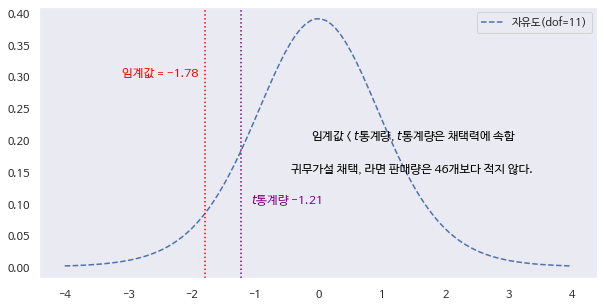

In [8]:
# 시각화
t_data = np.linspace(-4, 4 ,100)
t_dist = stats.t(df=n-1)

black = {"facecolor": "balck"}
plt.figure(figsize=(10, 5))

t_dist = stats.t(df=n-1)
plt.plot(t_data, t_dist.pdf(t_data), 'b--', label=("자유도(dof=%d)" % 11))

# 95%의 임계값 표시
plt.axvline(x=t_95, color='red', linestyle=':')
plt.text(-2.5, .3, '임계값 = ' + str(round(t_95, 2)), horizontalalignment='center', color='red')

# 위에서 구한 카이분포 통계값 = z통계량
plt.axvline(x=t_value, color='purple', linestyle=':')
plt.text(-0.5, .1, '$t$통계량 ' + str(round(t_value, 2)), horizontalalignment='center', color='purple')
plt.text(1.5, .2, '임계값 < $t$통계량, $t$통계량은 채택력에 속함 ', horizontalalignment='center', color='black')
plt.text(1.5, .15, '귀무가설 채택, 라면 판매량은 46개보다 적지 않다. ', horizontalalignment='center', color='black')
plt.grid()
plt.legend()
plt.show()

## p-value(유의확률 : significant probability)
- 유의확률의 값은 확률밀도함수에서 표본값을 기준으로 만들어진 양측 꼬리(tail) 부분에 해당하는 영역의 면적
- 귀무가설이 맞음에도 불구하고 현재 검정 통계량값과 같은 혹은 대립가설을 더 옹호하는 검정 통계량값이 나올 확률

1. 모분산을 모르고 n<30 경우 모평균의 가설 검정'의 사례 정리
- 통계량t = -1.1644039042479846
- 95% 좌측검정 기각값 : -1.7958848187036691
- 자유도 df : 12 - 1

In [9]:
# 변이 분석
n = 12
s_mu = 42
s_sigma = 11.9
hysis_mu = 46

# 95% 좌측검정 기각값(유의수준:5%), df: 자유도
t_95 = round(-1 * stats.t.ppf(0.95, df=n-1), 3)     # 좌측검정 * -1

print("기각값 :", t_95)

# 통계량 t값 계산
t_value = (s_mu - hysis_mu) / (s_sigma / np.sqrt(n))
print('t통계량 :', round(t_value,3))

기각값 : -1.796
t통계량 : -1.164


In [10]:
# p_value(유의확률) 계산
round(stats.t(df=11).cdf(t_value), 3)

0.134

Text(-3, 0.25, '검정 통계량 t=-1.164(유의확률 0.13)')

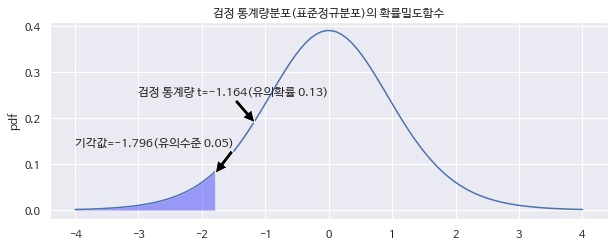

In [11]:
## 시각화
norm_rv = stats.t(df=11)

xx = np.linspace(-4, 4, 100)
plt.figure(figsize=(10, 8))
plt.subplot(211)
plt.plot(xx, norm_rv.pdf(xx))
plt.ylabel("pdf")
plt.title("검정 통계량분포(표준정규분포)의 확률밀도함수")
black = {"facecolor": "black"}

# 기각값 texr
plt.annotate('기각값=-1.796(유의수준 0.05)', xy=(-1.79, 0.08), xytext=(-4, 0.14), arrowprops=black)

# 기각값 면적
xx2 = np.linspace(-4, -1.796, 100)
plt.fill_between(xx2, norm_rv.pdf(xx2), facecolor='blue', alpha=0.35)

# P-value(유의확률) test
plt.annotate('검정 통계량 t=-1.164(유의확률 0.13)', xy=(-1.164, 0.19), xytext=(-3, 0.25), arrowprops=black)

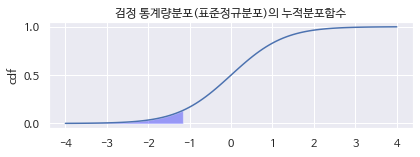

In [12]:
# P-value(유의확률) 면적
xx3 = np.linspace(-4, -1.164, 100)
plt.fill_between(xx3, norm_rv.pdf(xx3), facecolor='red', alpha=0.35)

plt.text(1, .15, '$(α = 0.05) < (P-Value = 0.134)$', horizontalalignment='center', color='red')
plt.text(1, .10, '$P$값이 유의수준보다 크므로 $H_0$ 기각되지 않는다', horizontalalignment='center', color='red')
plt.text(1, .05, '결론 : 라면 판매량은 46개보다 적지 않다.', horizontalalignment='center', color='red')

# 누적분포도
plt.subplot(212)
plt.plot(xx, norm_rv.cdf(xx))

plt.fill_between(xx3, norm_rv.cdf(xx3), facecolor='blue', alpha=0.35)
plt.ylabel("cdf")
plt.title("검정 통계량분포(표준정규분포)의 누적분포함수")

plt.tight_layout()
plt.show()